In [70]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
from bcb import sgs
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
#define the analysis period
report_start = date.fromisoformat('1996-01-01')  # BCB has GDP data since 1996
report_end = date.today()

#collect real gdp data from the central bank (seasonally adjusted data)
real_gdp_brazil = sgs.get({'PIB Dessazonalizado': 22109}, start=report_start, end=report_end)

#convert the data to quarterly frequency (using the last available value for each quarter)
real_gdp_brazil = real_gdp_brazil.resample('Q').last()

#calculate the quarterly growth (compared to the previous quarter)
real_gdp_quarterly_growth = real_gdp_brazil.pct_change() * 100

#calculate the annualized quarterly growth (quarterly at annual rate)
real_gdp_quarterly_change = ((real_gdp_brazil / real_gdp_brazil.shift(1)).pow(4) - 1) * 100

#remove null values
real_gdp_quarterly_growth.dropna(inplace=True)
real_gdp_quarterly_change.dropna(inplace=True)

#create a dataframe with both percentage growth columns
real_gdp_brazil['Real GDP (quarterly growth)'] = real_gdp_quarterly_growth
real_gdp_brazil['Real GDP over quarter at annual rate'] = real_gdp_quarterly_change

#display the formatted table with both percentage growth columns
cm = sns.color_palette('Blues', as_cmap=True)
IDX_FORMAT = '{:%Y-%m}'
real_gdp_brazil[['Real GDP (quarterly growth)', 'Real GDP over quarter at annual rate']].tail(18).style.format_index(IDX_FORMAT).format({
    'Real GDP (quarterly growth)': '{:.2f}%', 
    'Real GDP over quarter at annual rate': '{:.2f}%'
}) \
    .set_properties(subset=['Real GDP (quarterly growth)', 'Real GDP over quarter at annual rate'], **{'width': '200px'}) \
    .set_table_styles([{'selector': 'th', 'props': 'text-align: right; width: 100px'}]) \
    .background_gradient(cmap=cm, subset=['Real GDP (quarterly growth)', 'Real GDP over quarter at annual rate'])


C:\Users\Augusto\AppData\Local\Temp\ipykernel_10736\2932741850.py:9: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  real_gdp_brazil = real_gdp_brazil.resample('Q').last()


,Real GDP (quarterly growth),Real GDP over quarter at annual rate
Date,,
2020-03,-2.20%,-8.51%
2020-06,-8.82%,-30.89%
2020-09,7.87%,35.42%
2020-12,3.68%,15.57%
2021-03,0.99%,4.03%
2021-06,-0.60%,-2.38%
2021-09,0.11%,0.44%
2021-12,1.13%,4.60%
2022-03,0.86%,3.49%


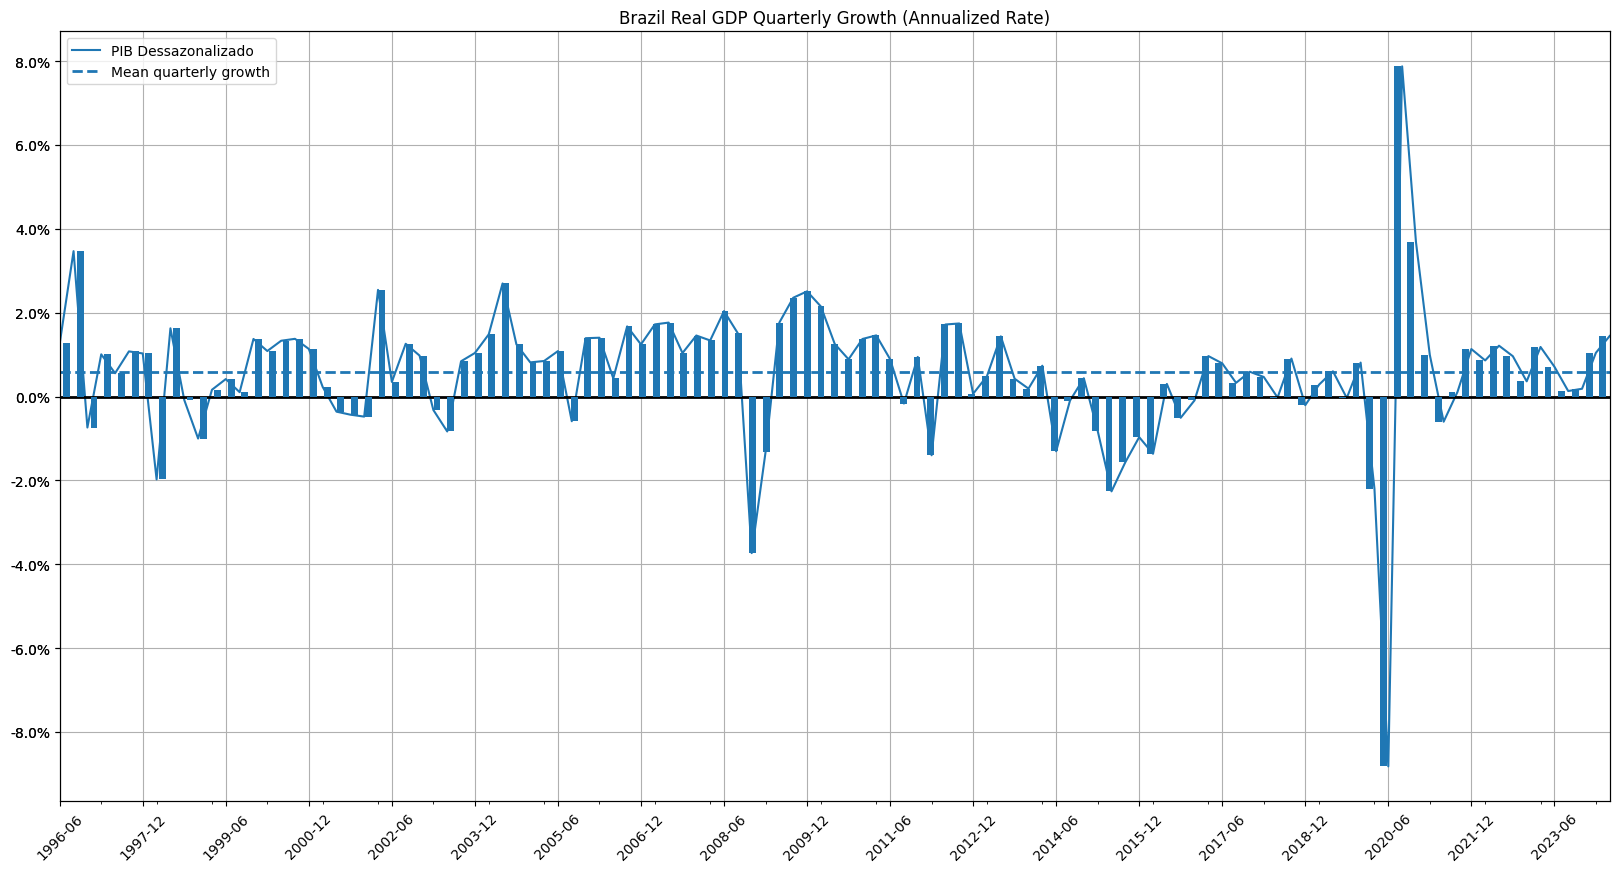

In [107]:
#plot the gdp growth rate chart
ax = real_gdp_quarterly_growth.iloc[:, 0].plot(figsize=(20, 10), grid=True, title='Brazil Real GDP Quarterly Growth (Annualized Rate)',
                   xticks=real_gdp_quarterly_growth.index[::6], xlabel='', rot=45, yticks=np.arange(-.03, .081, 0.01))
ax.axhline(y=0, lw=2, c='k')
ax.axhline(y=real_gdp_quarterly_growth.iloc[:, 0].mean(), lw=2, ls='--', c='#1f77b4', label='Mean quarterly growth')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:.1f}%'))
ax.yaxis.set_major_locator(plt.MaxNLocator(prune='both', nbins=10))

#plot a bar chart at the top
ax2 = ax.twiny()
real_gdp_quarterly_growth.iloc[:, 0].plot.bar(ax=ax2, xlabel='', legend=False)
ax2.xaxis.set_major_locator(mtick.NullLocator())
ax.legend()
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, real_gdp_quarterly_growth.index[::6])))
plt.show()


In [110]:
#obtain the mean of the numeric values (as it's a series, get the correct value)
mean_growth_value = real_gdp_quarterly_growth.mean().values[0]

#convert the index to a date and format it
first_date = real_gdp_quarterly_growth.index[0].strftime('%Y-%m-%d')

#display the mean with the correct format
print(f'Mean level of real GDP growth rate since {first_date}: {mean_growth_value:.2f}%')


Mean level of real GDP growth rate since 1996-06-30: 0.58%


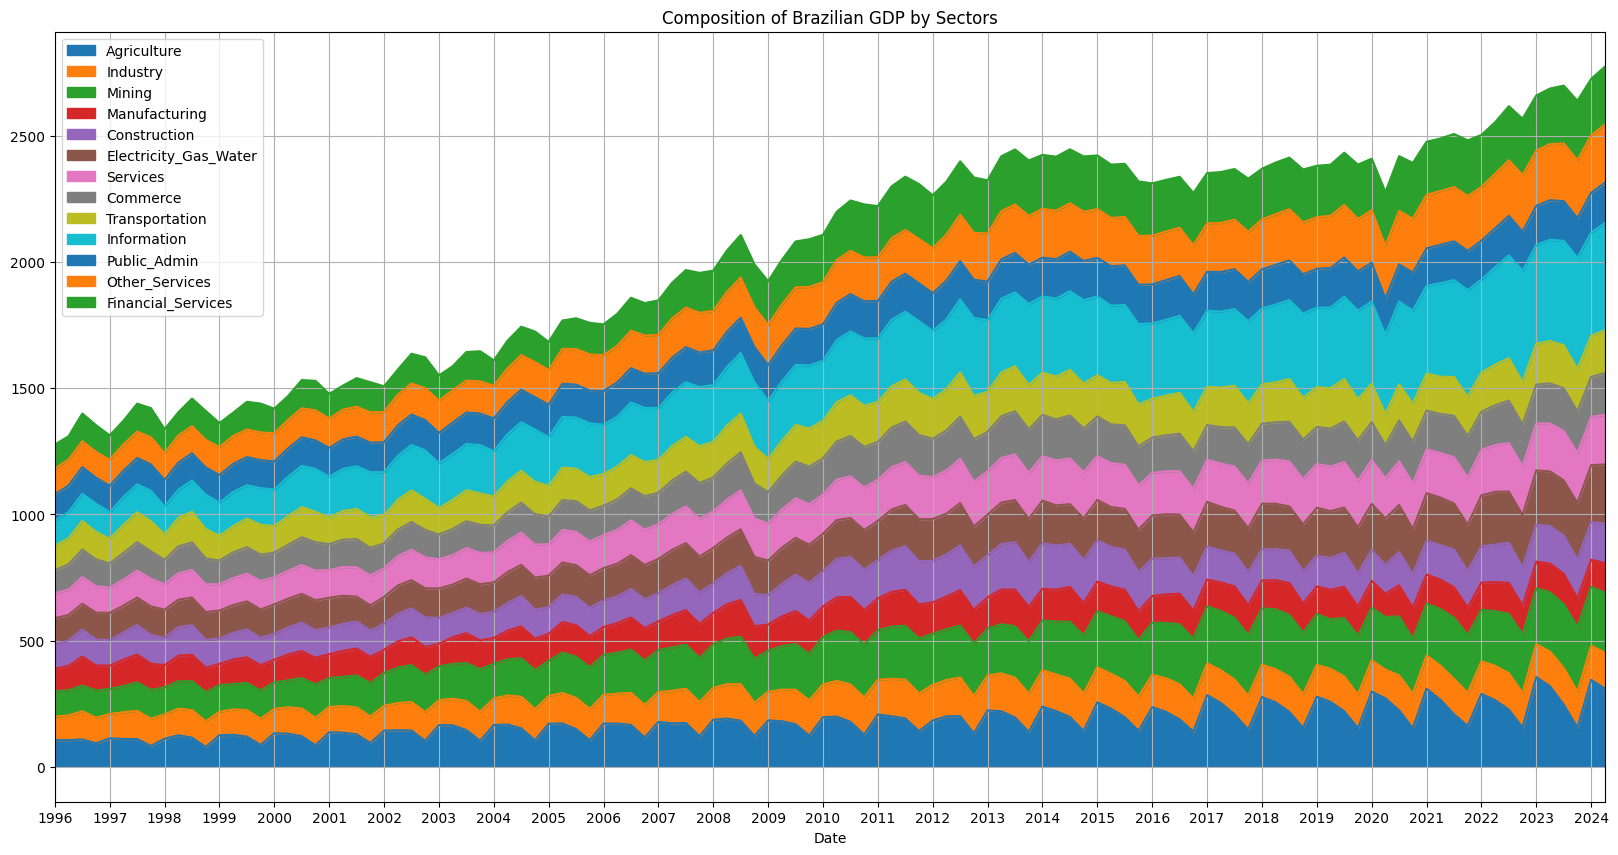

In [112]:
gdp_components = sgs.get({
    'Agriculture': 22083,
    'Industry': 22084,
    'Mining': 22085,
    'Manufacturing': 22086,
    'Construction': 22087,
    'Electricity_Gas_Water': 22088,
    'Services': 22089,
    'Commerce': 22090,
    'Transportation': 22091,
    'Information': 22092,
    'Public_Admin': 22093,
    'Other_Services': 22094,
    'Financial_Services': 22095,
    'Real_Estate': 22096
}, start=report_start, end=report_end)

gdp_components.tail()

gdp_total = gdp_components.iloc[:,-1]
gdp_components = gdp_components.iloc[:,:-1]

#plot the composition of Brazilian GDP by sectors
gdp_components.index = pd.to_datetime(gdp_components.index)
annual_ticks = gdp_components[gdp_components.index.month == 1].index 
ax = gdp_components.plot.area(figsize=(20, 10), grid=True, title='Composition of Brazilian GDP by Sectors')
ax.set_xticks(annual_ticks)
ax.set_xticklabels([tick.strftime('%Y') for tick in annual_ticks])
plt.show()



In [81]:
gdp_components.tail()

,Agriculture,Industry,Mining,Manufacturing,Construction,Electricity_Gas_Water,Services,Commerce,Transportation,Information,Public_Admin,Other_Services,Financial_Services
Date,,,,,,,,,,,,,
2023-04-01,319.08,137.49,235.15,113.11,149.36,216.26,190.00,159.01,167.86,400.93,156.90,222.27,220.48
2023-07-01,246.54,145.36,252.23,120.95,151.49,217.99,195.67,169.24,171.10,413.76,157.49,228.35,229.04
2023-10-01,155.50,141.09,257.67,112.69,153.35,225.57,197.43,164.94,167.52,440.99,157.13,229.51,236.14
2024-01-01,344.55,134.21,233.87,107.73,149.29,225.58,191.36,158.52,163.04,408.96,157.43,227.19,224.22
2024-04-01,309.96,142.85,237.48,117.14,155.89,234.61,196.71,165.37,169.00,425.45,159.87,230.55,229.36


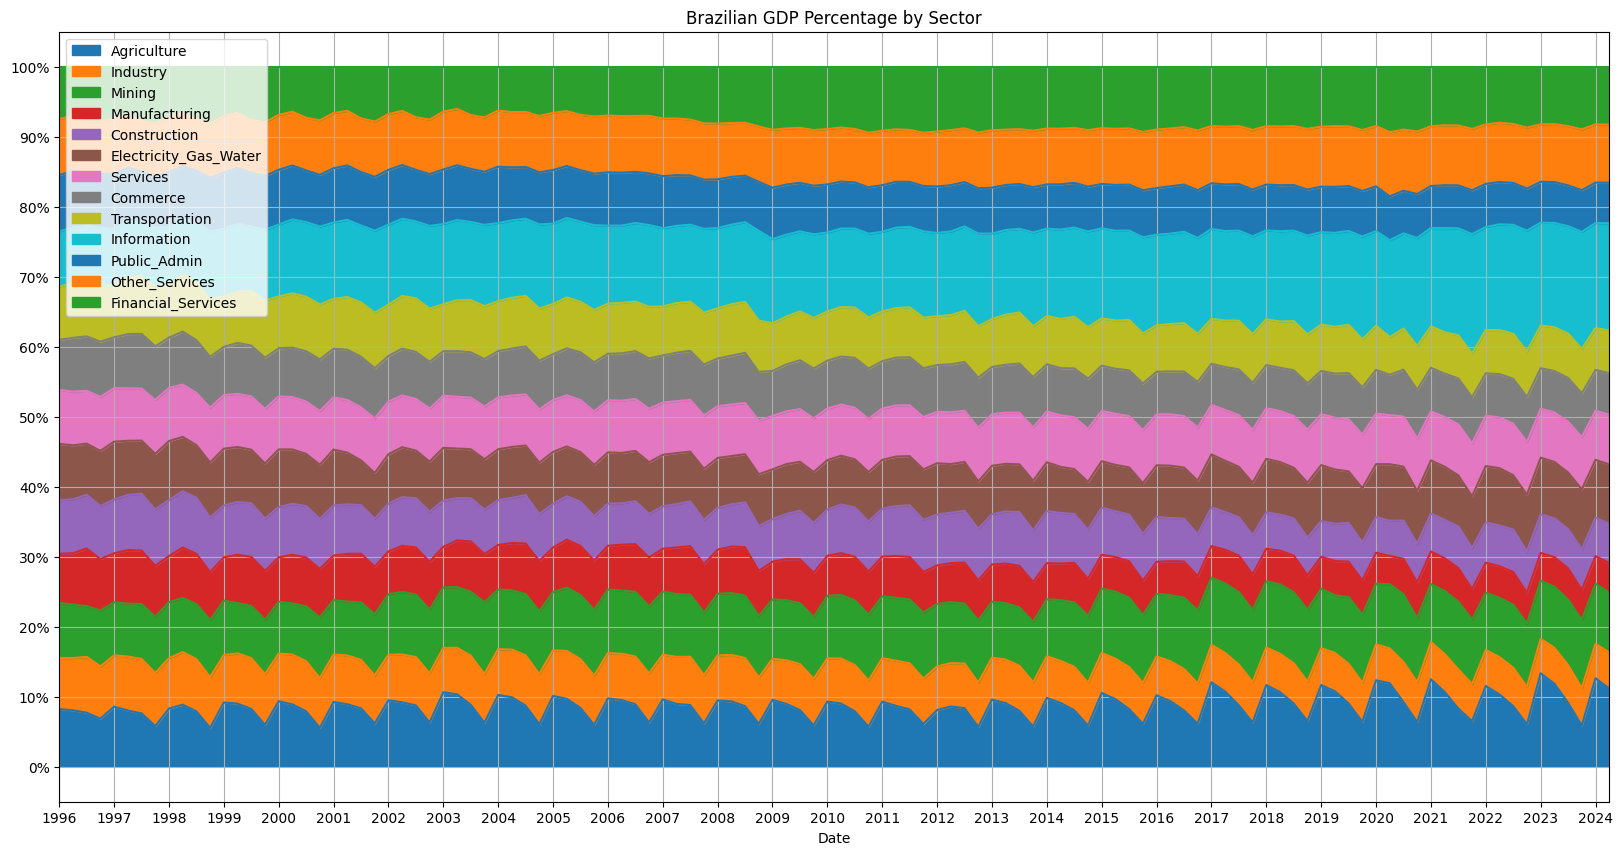

In [126]:
gdp_components_pct.index = pd.to_datetime(gdp_components_pct.index)

#extract the annual ticks for labeling
annual_ticks = gdp_components_pct[gdp_components_pct.index.month == 1].index  # Adjust to desired month (e.g., January)

#plotting the percentage area
ax = gdp_components_pct.plot.area(figsize=(20, 10), grid=True, title='Brazilian GDP Percentage by Sector',
                                  yticks=np.arange(0, 1.01, .1))

#format the y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

#set annual ticks on the x-axis and format the labels to display only the year
ax.set_xticks(annual_ticks)
ax.set_xticklabels([tick.strftime('%Y') for tick in annual_ticks])

#show legend and plot
ax.legend(loc='upper left')
plt.show()


In [115]:
gdp_components_pct.iloc[-1,:].sort_values(ascending=False).head(5)

Information              0.153357
Agriculture              0.111728
Mining                   0.085602
Electricity_Gas_Water    0.084567
Other_Services           0.083104
Name: 2024-04-01 00:00:00, dtype: float64

In [116]:
periods = [10, 5]

In [91]:
gdp_total_pct_chg = pd.DataFrame([gdp_total.pct_change(4*period).iloc[-1] for period in periods], 
                                 index=['Over past {:d} years'.format(period) for period in periods],
                                 columns=['Percentage Change'])
gdp_total_pct_chg

,Percentage Change
Over past 10 years,0.194934
Over past 5 years,0.179032


In [117]:
gdp_components_pct_chg = pd.concat(
    [((gdp_components - gdp_components.shift(4*period)).divide(gdp_total.shift(4*period), axis=0)).iloc[-1] for period in periods],
                                    axis=1)
gdp_components_pct_chg.columns = ['Over past {:d} years'.format(period) for period in periods]

In [118]:
gdp_components_pct_chg.sort_values(by=gdp_components_pct_chg.columns[0], inplace=True)
gdp_components_pct_chg

,Over past 10 years,Over past 5 years
Construction,-0.116387,0.177225
Manufacturing,-0.056881,0.000723
Industry,-0.012145,0.073949
Transportation,-0.004944,0.055221
Commerce,0.015685,0.090811
Public_Admin,0.020629,0.019571
Financial_Services,0.094843,0.161749
Services,0.113335,0.120860
Mining,0.166860,0.246357
Other_Services,0.233811,0.141154


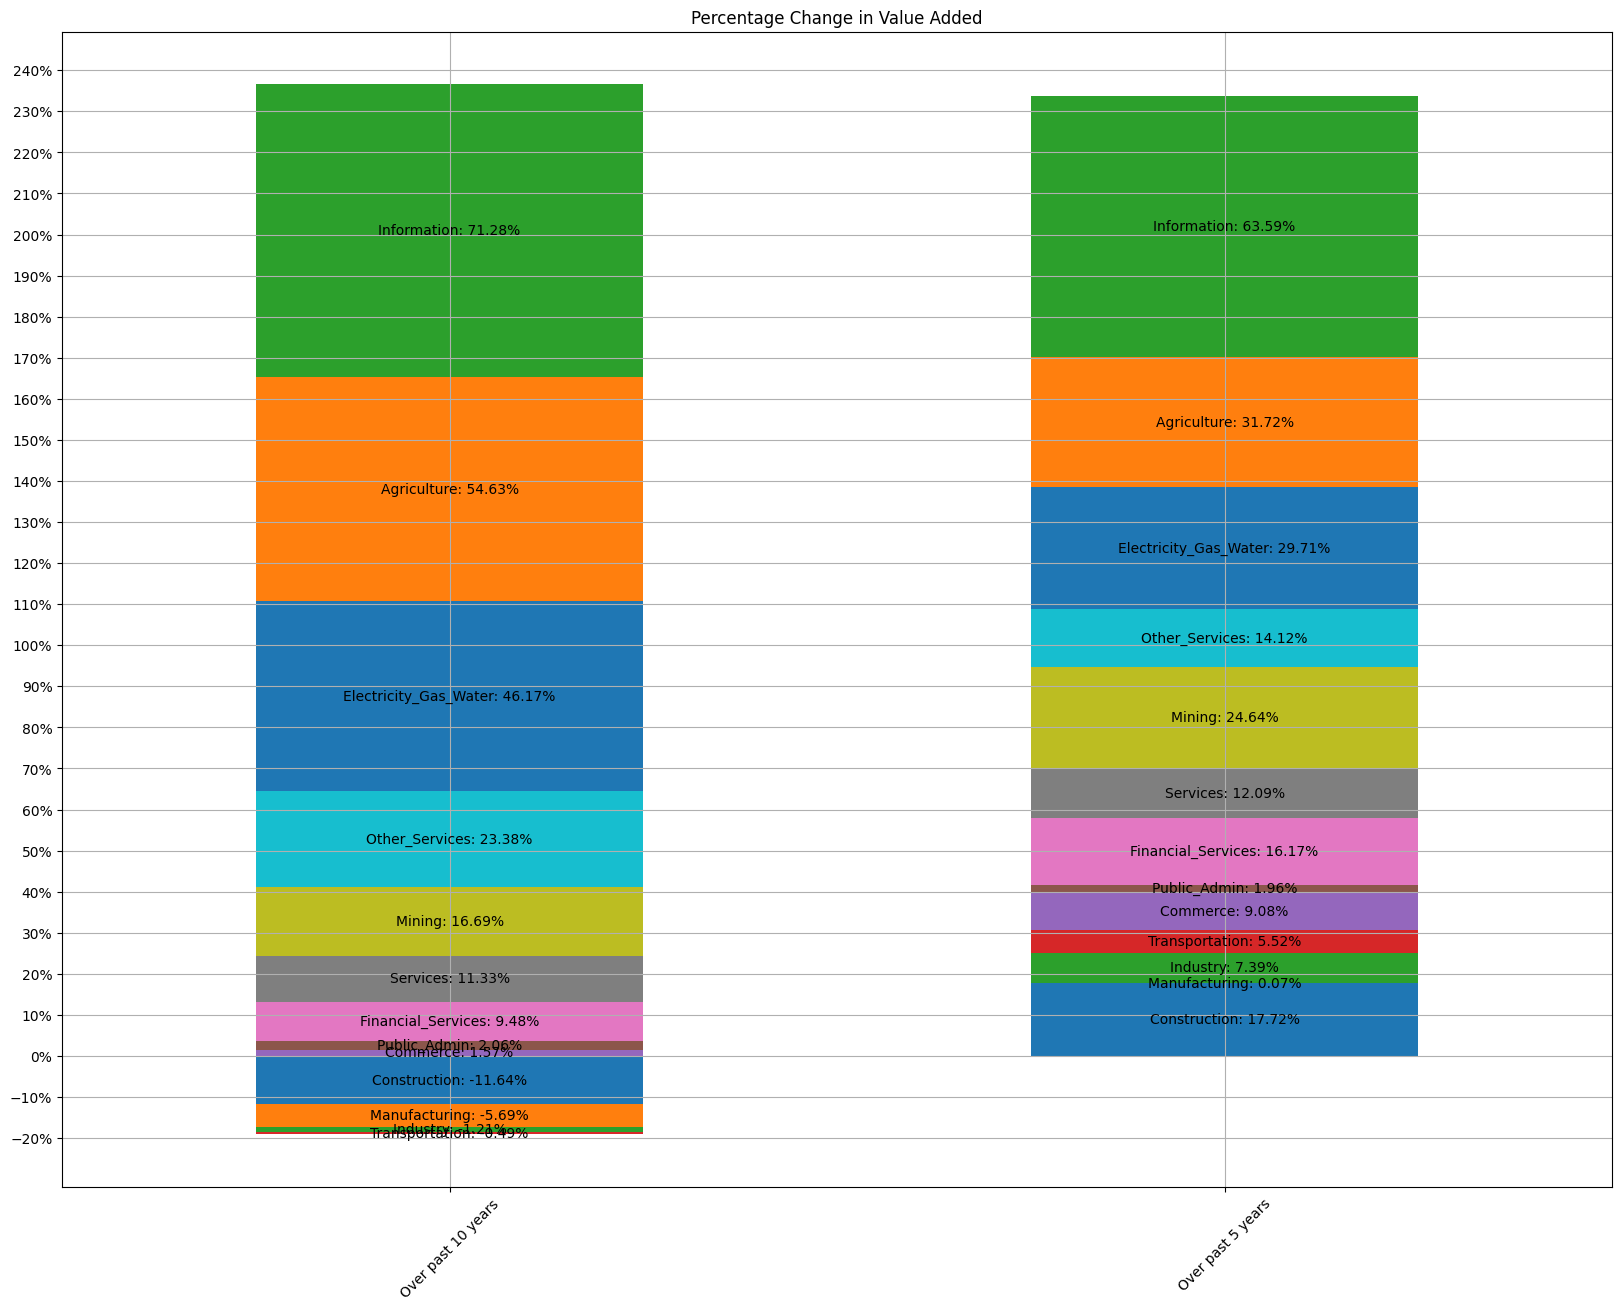

In [119]:
ax = gdp_components_pct_chg.T.plot.bar(figsize=(20,15), grid=True, title='Percentage Change in Value Added',
                                       stacked=True, rot=45, yticks=np.arange(-.2, 2.5, .1))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.get_legend().remove()
for c in ax.containers:
    ax.bar_label(c, fmt=c.get_label() + ': {:.2%}', label_type='center')

In [120]:
gdp_components_pct_chg.sort_values(by=gdp_components_pct_chg.columns[0], ascending=False).iloc[:10,:1]

,Over past 10 years
Information,0.712847
Agriculture,0.546292
Electricity_Gas_Water,0.461703
Other_Services,0.233811
Mining,0.166860
Services,0.113335
Financial_Services,0.094843
Public_Admin,0.020629
Commerce,0.015685
Transportation,-0.004944


In [121]:
gdp_components_pct_chg.sort_values(by=gdp_components_pct_chg.columns[1], ascending=False).iloc[:5,1:]

,Over past 5 years
Information,0.635855
Agriculture,0.317235
Electricity_Gas_Water,0.297122
Mining,0.246357
Construction,0.177225


In [122]:
contracting_10y = gdp_components_pct_chg.sort_values(by=gdp_components_pct_chg.columns[0]).iloc[:, :1]
contracting_10y = contracting_10y.loc[contracting_10y.iloc[:,0] < 0]
contracting_5y = gdp_components_pct_chg.sort_values(by=gdp_components_pct_chg.columns[1]).iloc[:, 1:]
contracting_5y = contracting_5y.loc[contracting_5y.iloc[:,0] < 0]

In [123]:
contracting_10y

,Over past 10 years
Construction,-0.116387
Manufacturing,-0.056881
Industry,-0.012145
Transportation,-0.004944


In [124]:
contracting_5y

,Over past 5 years
